In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import numpy as np
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
import matplotlib.pyplot as plt

## 1. Create Data

In [4]:
nPerclust = 100
blur = 1

# Center of two class labels
# x any y corrdintates 
A = [1,1]    # class1
B = [5,1]    # class2

# Generate Data

a = [A[0] + np.random.randn(nPerclust)*blur , 
     A[1] + np.random.randn(nPerclust)*blur]

b = [B[0] + np.random.randn(nPerclust)*blur , 
     B[1] + np.random.randn(nPerclust)*blur]

# True Labels
labels_np = np.vstack((np.zeros((nPerclust,1)),
                      np.ones((nPerclust,1))
                      ))

# COncatenate into matrix
data_np = np.hstack((a,b)).T

# Convert to Pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

## 2. Plotting data

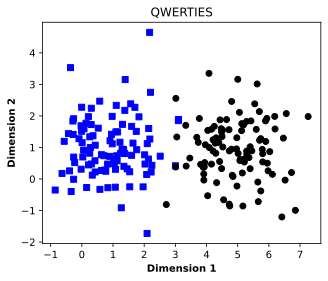

In [5]:
plt.figure(figsize = (5,4) , dpi = 130)

plt.plot(data[np.where(labels == 0)[0],0],
        data[np.where(labels == 0)[0],1],'bs')

plt.plot(data[np.where(labels == 1)[0],0],
        data[np.where(labels == 1)[0],1] , 'ko')

plt.title("QWERTIES")
plt.xlabel("Dimension 1" , fontweight = "bold")
plt.ylabel("Dimension 2" , fontweight = "bold")

plt.show()

## 3. MODEL BUILDING

In [6]:
# ANNclassify = nn.Sequential(
#                             # Neuron 1
#                             nn.Linear(2,4),
#                             nn.ReLU(),
#                             # Neuron 2
#                             nn.Linear(4,1),
#                             nn.Sigmoid()
#                            )
# ANNclassify

In [7]:
### Define the class

class Class_for_ANN(nn.Module):
    
    def __init__(self):
        super().__init__()

        # input layer
        self.inputlayer = nn.Linear(2,4)

        # output layer
        self.outputlayer = nn.Linear(4,1)

    # forward pass 
    # x - data containing predictors only
    def forward(self,x):

        # Pass through the input layer
        x = self.inputlayer(x)

        # Apply ReLu
        x = F.relu( x )

        # output layer
        x = self.outputlayer(x)
        #x = F.sigmoid(x)
        x = torch.sigmoid(x)

        return x

### create an instance of the class
ANNclassify = Class_for_ANN()

In [8]:
learningrate = 0.01

# Loss Function
lossfunc = nn.BCELoss()

# Optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr = learningrate)

## 4. Model Training

In [9]:
epochs = 1000
losses = torch.zeros(epochs)

for epoc in range(epochs):
        
    # Forward Propagation
    y_hat = ANNclassify(data)
    
    # Compute Losses
    loss = lossfunc(y_hat , labels)
    losses[epoc] = loss
    
    # Backpropagation
    optimizer.zero_grad()  # reinitialize
    loss.backward()
    optimizer.step()

## 5. Plotting losses

In [10]:
#losses

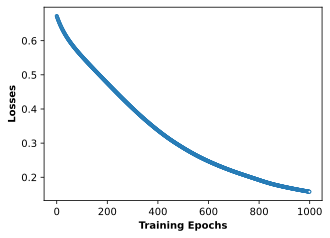

In [11]:
plt.figure(figsize = (5,3.5) , dpi = 140 )

plt.plot(losses.detach(), ".-" , markerfacecolor = "w" , linewidth = 0.1)

plt.xlabel("Training Epochs" , fontweight = "bold")
plt.ylabel("Losses" , fontweight = "bold")

plt.show()

## 6. Final Predictions

In [12]:
# Predictions value will lie between 0 and 1 because of sigmoid in the output-layer
predictions = ANNclassify(data)

predlabels = predictions >0.5

# Errors :

# Grabbing the index value of missclassified predictions
missclassified = np.where(predlabels != labels)[0]

# Accuruacy
accuracy  = (1 - (len(missclassified)/(2*nPerclust)))*100

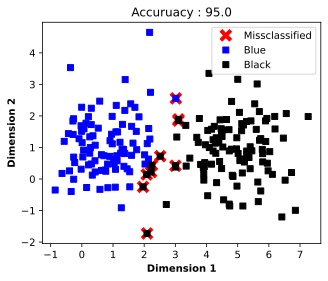

In [13]:
plt.figure(figsize = (5,4) , dpi = 130)

plt.plot(data[missclassified ,0] ,data[missclassified ,1] , 
        "rx" , markersize = 10 , markeredgewidth = 4)

plt.plot(data[np.where(~predlabels)[0],0],
        data[np.where(~predlabels)[0],1] , "bs")

plt.plot(data[np.where(predlabels)[0],0],
        data[np.where(predlabels)[0],1] , "ks")

plt.legend(["Missclassified" , "Blue" , "Black"] , bbox_to_anchor = (1,1))
plt.title(f"Accuruacy : {accuracy}")

plt.xlabel("Dimension 1" , fontweight = "bold")
plt.ylabel("Dimension 2" , fontweight = "bold")
plt.show()